# Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import config
import os

In [2]:
# set figure details
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

# Pathway coverage

In [3]:
pathway_coverage_overall = pd.read_csv(os.path.join(config.RAW_DIR, "humann_pathcoverage_overall.tsv"), sep="\t", index_col=0)


In [4]:
pathway_coverage_overall

,Blank_S67_Coverage,Postive-Control_S107_Coverage,magic-0001_S22_Coverage,magic-0004_S34_Coverage,magic-0011_S46_Coverage,magic-0013_S58_Coverage,magic-0015_S70_Coverage,magic-0016_S82_Coverage,magic-0017_S94_Coverage,magic-0018_S106_Coverage,...,magic-4106_S362_Coverage,magic-4108_S293_Coverage,magic-4110_S305_Coverage,magic-4111_S317_Coverage,magic-4119_S329_Coverage,magic-4123_S340_Coverage,magic-4128_S352_Coverage,magic-4130_S363_Coverage,magic-5222_S128_Coverage,magic-6559_S282_Coverage
# Pathway,,,,,,,,,,,,,,,,,,,,,
UNMAPPED,1.0,1.0,1.000000e+00,1.000000,1.0000,1.0,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000
UNINTEGRATED,1.0,1.0,1.000000e+00,1.000000,1.0000,1.0,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000
"12DICHLORETHDEG-PWY: 1,2-dichloroethane degradation",0.0,0.0,0.000000e+00,0.000000,0.0000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
"14DICHLORBENZDEG-PWY: 1,4-dichlorobenzene degradation",0.0,0.0,0.000000e+00,0.000000,0.0000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1CMET2-PWY: folate transformations III (E. coli),0.0,0.0,3.000000e-10,0.000000,0.0000,0.0,0.000000,0.000002,0.389837,0.000015,...,0.000000,0.0,0.0,1.0,1.0,0.999999,0.000037,0.925583,0.988708,0.000017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UDPNAGSYN-PWY: UDP-N-acetyl-D-glucosamine biosynthesis I,0.0,0.0,1.417811e-02,0.960017,0.9602,1.0,0.002092,0.704800,0.150613,0.892213,...,0.997929,1.0,1.0,0.0,0.0,0.000008,0.000000,0.000000,1.000000,0.000000
URDEGR-PWY: superpathway of allantoin degradation in plants,0.0,0.0,0.000000e+00,0.000000,0.0000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
URSIN-PWY: ureide biosynthesis,0.0,0.0,0.000000e+00,0.000000,0.0000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


In [5]:
def get_proportions(coverage, threshold):
    return (coverage >= threshold).mean(axis=1) * 100

In [6]:
def plot_counts(coverage, threshold):
    plt.figure(figsize=(10, 5), dpi=200)
    proportions = get_proportions(coverage, threshold)
    plt.hist(proportions, bins=100, cumulative=-1)
    plt.ylabel("Number of pathways", fontsize=20)
    plt.xlabel(f"\% of samples with at least {threshold * 100}\% coverage", fontsize=20)
    plt.show()

In [7]:
thresholds = [0.25, 0.5, 0.75, 0.9]

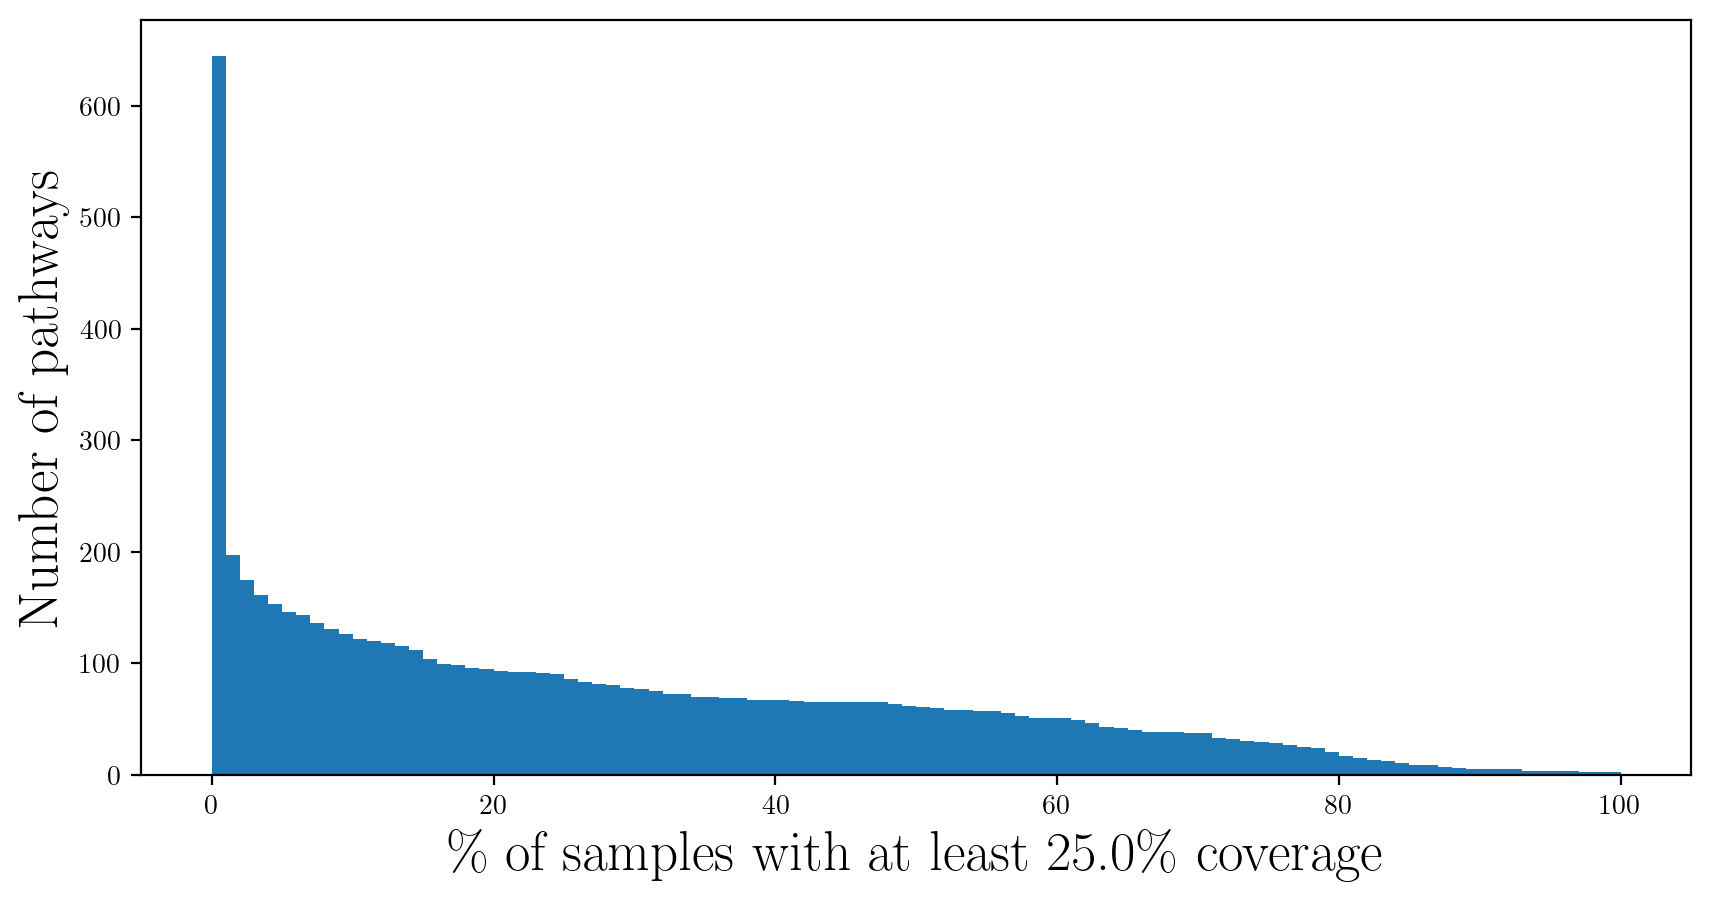

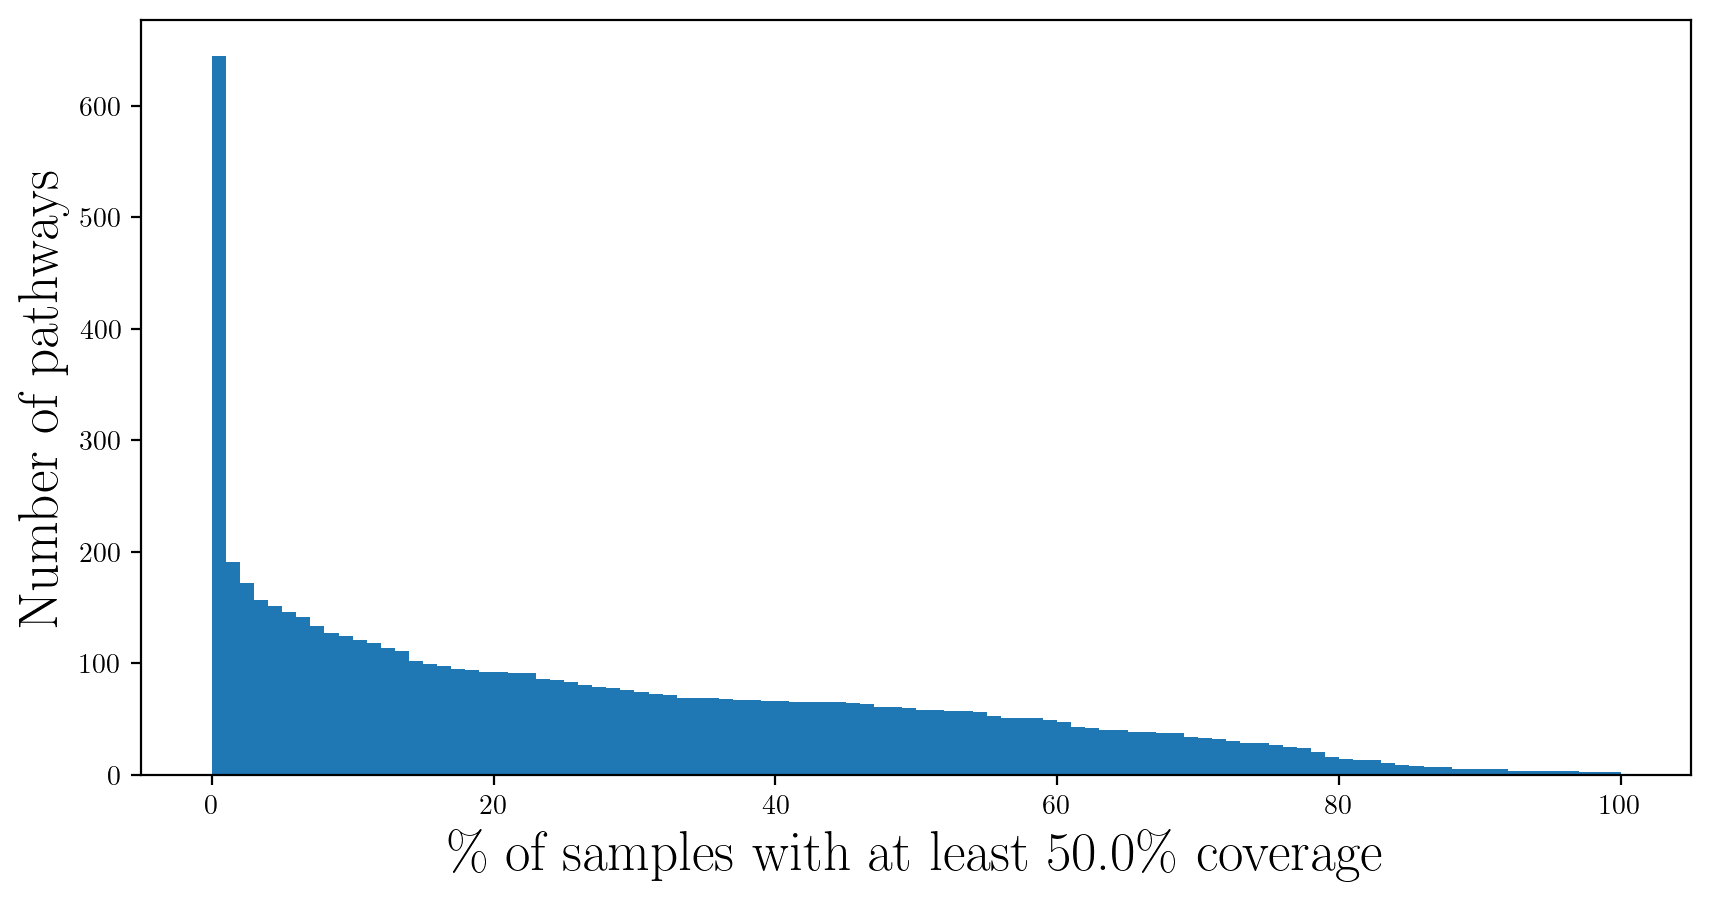

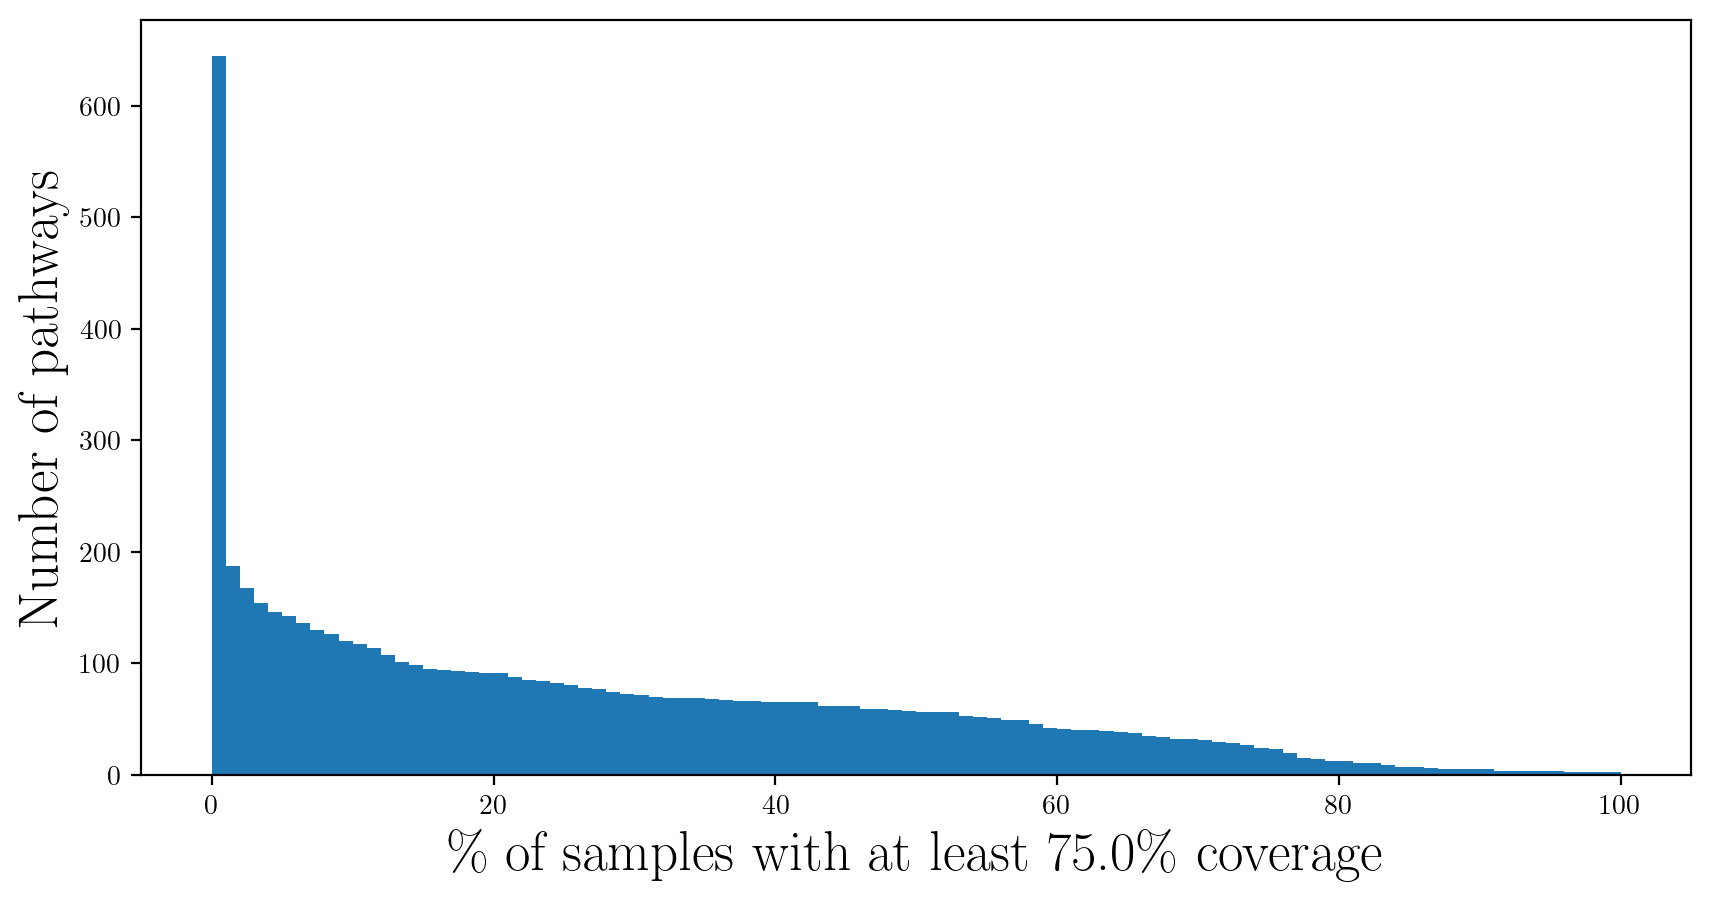

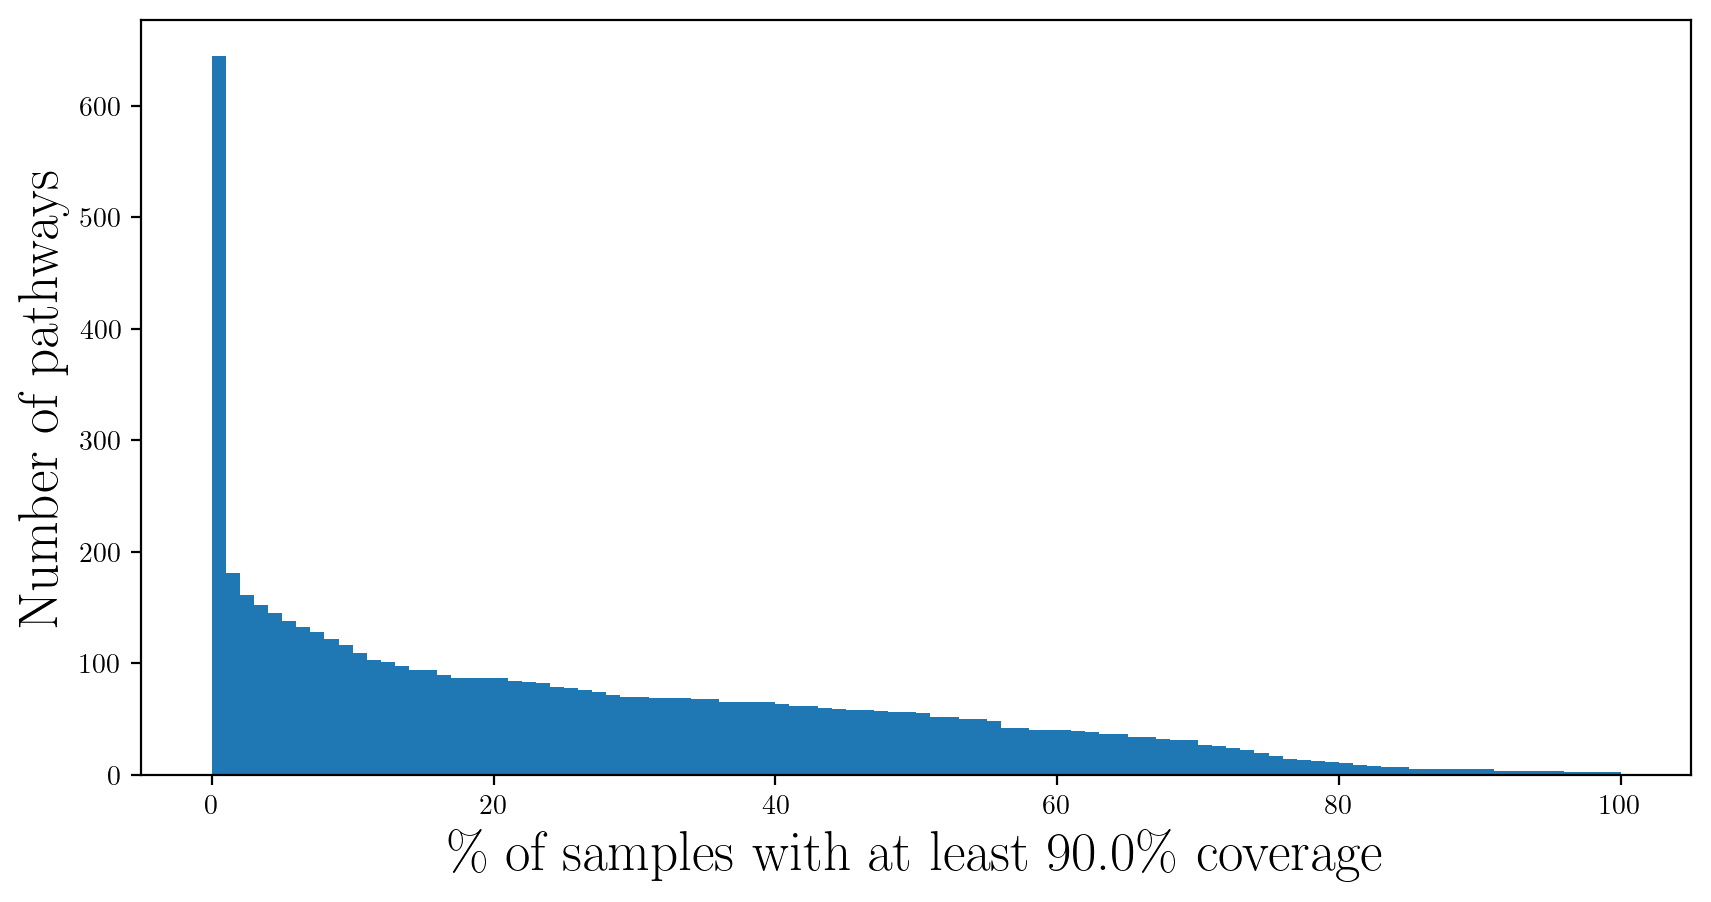

In [8]:
for thresh in thresholds:
    plot_counts(pathway_coverage_overall, thresh)

In [10]:
proportions = get_proportions(pathway_coverage_overall, 0.75)
proportions

# Pathway
UNMAPPED                                                       100.000000
UNINTEGRATED                                                   100.000000
12DICHLORETHDEG-PWY: 1,2-dichloroethane degradation              0.000000
14DICHLORBENZDEG-PWY: 1,4-dichlorobenzene degradation            0.000000
1CMET2-PWY: folate transformations III (E. coli)                42.267184
                                                                  ...    
UDPNAGSYN-PWY: UDP-N-acetyl-D-glucosamine biosynthesis I        36.723947
URDEGR-PWY: superpathway of allantoin degradation in plants      0.000000
URSIN-PWY: ureide biosynthesis                                   0.000000
VALDEG-PWY: L-valine degradation I                               0.000000
VALSYN-PWY: L-valine biosynthesis                               95.731707
Length: 645, dtype: float64

In [13]:
keep_pathways = proportions >= 25
keep_pathways = keep_pathways[keep_pathways].iloc[2:]
keep_pathways

# Pathway
1CMET2-PWY: folate transformations III (E. coli)                       True
ANAGLYCOLYSIS-PWY: glycolysis III (from glucose)                       True
ARGSYN-PWY: L-arginine biosynthesis I (via L-ornithine)                True
ARGSYNBSUB-PWY: L-arginine biosynthesis II (acetyl cycle)              True
ARO-PWY: chorismate biosynthesis I                                     True
                                                                       ... 
SER-GLYSYN-PWY: superpathway of L-serine and glycine biosynthesis I    True
THRESYN-PWY: superpathway of L-threonine biosynthesis                  True
TRNA-CHARGING-PWY: tRNA charging                                       True
UDPNAGSYN-PWY: UDP-N-acetyl-D-glucosamine biosynthesis I               True
VALSYN-PWY: L-valine biosynthesis                                      True
Length: 78, dtype: bool

In [15]:
clean_pathways = pathway_coverage_overall.loc[keep_pathways.index]
clean_pathways

,Blank_S67_Coverage,Postive-Control_S107_Coverage,magic-0001_S22_Coverage,magic-0004_S34_Coverage,magic-0011_S46_Coverage,magic-0013_S58_Coverage,magic-0015_S70_Coverage,magic-0016_S82_Coverage,magic-0017_S94_Coverage,magic-0018_S106_Coverage,...,magic-4106_S362_Coverage,magic-4108_S293_Coverage,magic-4110_S305_Coverage,magic-4111_S317_Coverage,magic-4119_S329_Coverage,magic-4123_S340_Coverage,magic-4128_S352_Coverage,magic-4130_S363_Coverage,magic-5222_S128_Coverage,magic-6559_S282_Coverage
# Pathway,,,,,,,,,,,,,,,,,,,,,
1CMET2-PWY: folate transformations III (E. coli),0.0,0.0,3.000000e-10,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000002,0.389837,0.000015,...,0.000000e+00,0.000000,0.000000,1.000000,1.000000,0.999999,3.724940e-05,0.925583,0.988708,0.000017
ANAGLYCOLYSIS-PWY: glycolysis III (from glucose),0.0,0.0,0.000000e+00,2.718200e-06,8.075431e-01,9.631981e-01,3.047092e-03,0.000061,1.000000,0.725004,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,9.997778e-01,1.000000,1.000000,0.999924
ARGSYN-PWY: L-arginine biosynthesis I (via L-ornithine),0.0,0.0,0.000000e+00,1.766000e-07,2.720000e-08,2.422000e-07,1.186739e-02,0.000001,0.941391,0.638808,...,2.104548e-02,1.000000,0.000000,0.061668,0.999964,1.000000,0.000000e+00,1.000000,1.000000,0.988090
ARGSYNBSUB-PWY: L-arginine biosynthesis II (acetyl cycle),0.0,0.0,0.000000e+00,0.000000e+00,1.010000e-08,3.707570e-05,1.607249e-04,0.000002,0.955156,0.000000,...,0.000000e+00,1.000000,0.000000,0.084292,0.999903,1.000000,0.000000e+00,1.000000,1.000000,0.968480
ARO-PWY: chorismate biosynthesis I,0.0,0.0,6.957000e-07,7.000000e-10,9.999922e-01,9.999940e-01,8.070776e-02,0.000006,1.000000,0.074193,...,0.000000e+00,0.971046,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SER-GLYSYN-PWY: superpathway of L-serine and glycine biosynthesis I,0.0,0.0,6.473970e-05,7.153749e-04,9.999999e-01,0.000000e+00,9.553292e-01,0.000016,0.998982,0.108925,...,1.300000e-09,0.000000,0.000000,0.891324,0.000000,1.000000,5.200000e-09,0.000000,0.989781,0.000000
THRESYN-PWY: superpathway of L-threonine biosynthesis,0.0,0.0,4.975634e-02,7.905266e-04,9.632563e-01,9.542070e-01,6.666000e-07,0.001181,0.999939,0.001297,...,1.345650e-05,0.999985,1.000000,1.000000,0.957851,1.000000,9.997854e-01,0.999584,0.999724,0.997808
TRNA-CHARGING-PWY: tRNA charging,0.0,0.0,9.951395e-01,9.880028e-01,0.000000e+00,9.996574e-01,7.276223e-04,0.932903,1.000000,0.078989,...,0.000000e+00,0.000000,0.999997,0.999999,1.000000,0.999999,1.000000e+00,1.000000,1.000000,1.000000


In [16]:
clean_pathways.to_csv(os.path.join(config.CLEAN_DIR, "humann_pathcoverage_overall_clean.tsv"))